# Инструменты для анализа данных: pandas и seaborn

[ссылка на оригинальный ноутбук](https://miptstats.github.io/courses/ad_fivt/titanik.html)


## Титаник

Был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа.

Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

**Этот обучающий ноутбук на примерах показывает основную функциональность библиотек `pandas` и `seaborn`.**

Подробные обучающие ноутбуки можно посмотреть по ссылкам:
* <a href="https://miptstats.github.io/courses/python/08_pandas1.html" target="_blank">Библиотека pandas — типы данных Series и DataFrame, запись и чтение файлов, работа с датами.</a>
* <a href="https://miptstats.github.io/courses/python/10_pandas2.html" target="_blank">Библиотека pandas — объединение таблиц, группировки, таблицы сопряженности и сводные таблицы.</a>
* <a href="https://miptstats.github.io/courses/python/09_seaborn.html" target="_blank">Библиотека seaborn.</a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', font_scale=1.3)

### 1. Чтение данных

<i><a href="https://miptstats.github.io/courses/python/08_pandas1.html#3.-Чтение-и-запись-данных" target="_blank">Подробнее про чтение и запись данных.</a></i>

Прочитаем данные с помощью библиотеки `pandas`. Библиотека pandas предназначена для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

При чтении укажем, что первую колонку нужно использовать в качестве индекса (т.е. ключа) в таблице: `index_col=0`.

Мы видим таблицу со следующими колонками:
* `Pclass` — класс пассажира (`1` — высший, `2` — средний, `3` — низший);
* `Name` — имя;
* `Sex` — пол;
* `Age` — возраст;
* `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
* `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;
* `Ticket` — номер билета;
* `Fare` — плата за проезд;
* `Cabin` — каюта;
* `Embarked` — порт посадки (`C` — Шербур; `Q` — Квинстаун; `S` — Саутгемптон).

In [2]:
data = pd.read_csv('train.csv', sep=',', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
type(data)

pandas.core.frame.DataFrame

Можно вывести только строго указанное количество строк

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.tail(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0,NaN,S
347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0,NaN,S


Соответствующая переменная имеет тип данных `DataFrame`.

In [ ]:
type(data)

pandas.core.frame.DataFrame

### 2. Способы извлечения данных

Данные из отдельной колонки

In [9]:
data['Survived']

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
type(data['Name'])

pandas.core.series.Series

Если имя колонки "достаточно хорошее", то можно и так

In [14]:
data.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Данные по столбцу имеют тип данных `Series`.

In [15]:
type(data.Name)

pandas.core.series.Series

Можно вытащить сразу несколько колонок

In [17]:
data[ ['Survived', 'Pclass', 'Name'] ]

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"
...,...,...,...
887,0,2,"Montvila, Rev. Juozas"
888,1,1,"Graham, Miss. Margaret Edith"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""


Имена всех колонок

In [18]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Список всех индексов таблицы (т.е. ключей)

In [19]:
data.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

Название колонки-индекса

In [21]:
data.index.name

'PassengerId'

Тип данных в каждой из колонок таблицы

In [22]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Строку таблицы, соответствующую *ключу 1*, можно получить через `loc`

In [29]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
data.loc[1]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [37]:
data.loc[1:4]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [35]:
data.loc[1, "Name"]

'Braund, Mr. Owen Harris'

Обратите внимание, что *обычный численный индекс* этой строки равен 0. По нему также можно извлекать строку с мопощью `iloc`.

In [43]:
data.iloc[0]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

Если же попробовать запустить

In [44]:
data.loc[0]

KeyError: ignored

то возникнет исключение `KeyError: 0`, поскольку ключа `0` в этой таблице нет.

Можно извлечь несколько строк

In [45]:
data.iloc[0:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [46]:
data.loc[1:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Можно извлечь конкретное значение

In [50]:
data.iloc[0]['Name']

'Braund, Mr. Owen Harris'

Или так

In [51]:
data.iloc[0, 2]

'Braund, Mr. Owen Harris'

In [52]:
data.iloc[0, 2:4]

Name    Braund, Mr. Owen Harris
Sex                        male
Name: 1, dtype: object

### 3. Примеры анализа данных из таблицы

#### 3.1 Простые операции из `pandas`

Все описательные статистики по каждой колонке с вещественным типом данных

In [54]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Идентификация пропусков в таблице

In [58]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Можно посчитать долю пропущенных значений в каждой колонке

In [60]:
data.isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

Сортировка по столбцу

In [ ]:
data.sort_values(by='Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


#### 3.2 Графики с помощью `seaborn`

Посмотрим, как можно работать с библиотекой `seaborn`. Это популярная библиотека готовых шаблонов для статистической визуализации, написанная на бэкенде `matplotlib`. Она имеет высокоуровневый интерфейс и по умолчанию может строить более эстетичные графики.

Построим гистограмму по возрасту отдельно для мужчин и женщин.

In [61]:
import warnings

warnings.filterwarnings("ignore")

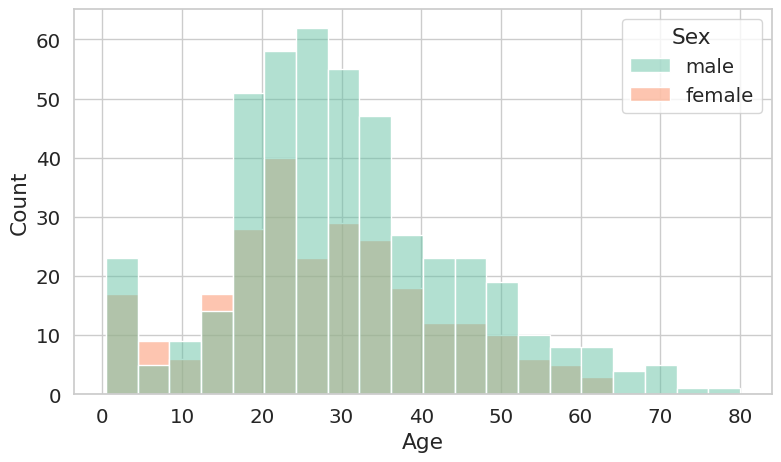

In [62]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=data, x='Age', hue='Sex')

Построим боксплоты (ящики с усами) для стоимости билета в зависимости от класса.

<i><a href="https://miptstats.github.io/courses/python/09_seaborn.html#4.-Box-plot" target="_blank">Подробнее про боксплоты.</a></i>

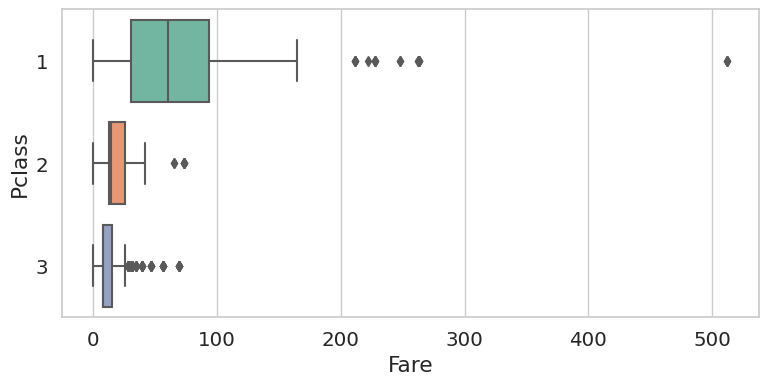

In [63]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=data, x='Fare', y='Pclass', orient='h')

Ограничим значения по горизонтальной оси

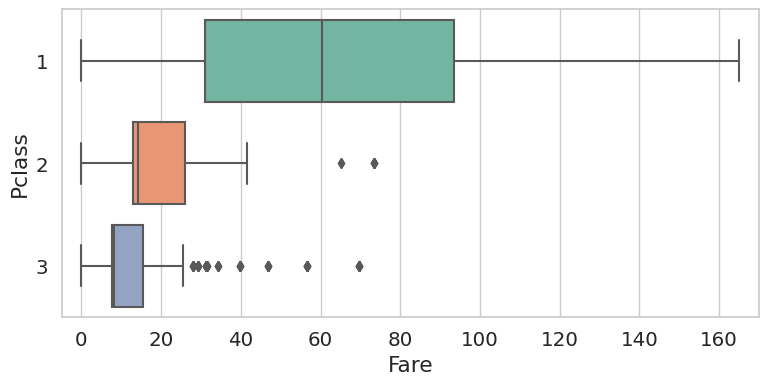

In [64]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=data, x='Fare', y='Pclass', orient='h')
    plt.xlim((-5, 170))

#### 3.3 Более сложные операции из `pandas`

<i><a href="https://miptstats.github.io/courses/python/10_pandas2.html" target="_blank">Подробнее про группировку данных.</a></i>

Сгруппируем данные по классу и усредним по всем численным колонкам

In [67]:
data[['Survived', 'Pclass', 'Age']].groupby(by="Pclass")

In [68]:
data[['Survived', 'Pclass', 'Age']].groupby(by='Pclass').mean()

,Survived,Age
Pclass,,
1,0.629630,38.233441
2,0.472826,29.877630
3,0.242363,25.140620


Похожим образом можно для каждого класса посчитать функции минимума и максимума

In [69]:
data_ = data[["Survived","Pclass","Age","SibSp"]]

In [70]:
data_.groupby(by='Pclass').aggregate([min, max, np.mean])

Survived                 Age                  SibSp              
            min max      mean   min   max       mean   min max      mean
Pclass                                                                  
1             0   1  0.629630  0.92  80.0  38.233441     0   3  0.416667
2             0   1  0.472826  0.67  70.0  29.877630     0   3  0.402174
3             0   1  0.242363  0.42  74.0  25.140620     0   8  0.615071

---

<i><a href="https://miptstats.github.io/courses/python/10_pandas2.html#4.-Таблицы-сопряженности-(Crosstab)-и-сводные-таблицы-(Pivot-table)" target="_blank">Подробнее про агрегирующие функции.</a></i>

С помощью функции `crosstab` можно очень легко получить информацию о том, сколько человек определенного пола ехали в таком-то классе, а также сумму по строкам и столбцам.

In [73]:
pd.crosstab(data['Sex'], data['Pclass'],  margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


А с помощью похожей функции `pivot_table` можно легко получить информацию о том, каков максимальный возраст среди пассажиров определенного пола для каждого класса.

In [74]:
pd.pivot_table(
    data,
    values='Age',
    index='Sex',
    columns='Pclass',
    aggfunc=np.max
)

Pclass,1,2,3
Sex,,,
female,63.0,57.0,63.0
male,80.0,70.0,74.0


---

Почитайте также про <i><a href="https://miptstats.github.io/courses/python/10_pandas2.html#2.-Объединение-таблиц" target="_blank">операции объединения таблиц</a></i>, например, `merge` и `join`.